In [305]:
import unittest
import os
import sys
import pathlib
import urllib
import shutil
import re
import zipfile

import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision
%load_ext autoreload
%autoreload 2

test = unittest.TestCase()
plt.rcParams.update({'font.size': 12})
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cuda


In [306]:
import util.plot as plot
import util.download
import torchvision.transforms as T
from torchvision.datasets import ImageFolder

DATA_DIR = pathlib.Path.home().joinpath('.pytorch-datasets')

# MPIIGaze

In [384]:
DATA_URL = 'http://datasets.d2.mpi-inf.mpg.de/MPIIGaze/MPIIGaze.tar.gz'
# _, dataset_dir = util.download.download_data(out_path=DATA_DIR, url=DATA_URL, extract=True, force=False)

ds_path = DATA_DIR.joinpath('MPIIGaze\\MPIIGaze\\Data\\Original\\p00\\day03')
ds_mp2 = ImageFolder(os.path.dirname(ds_path), tf)

with open(DATA_DIR.joinpath('MPIIGaze\\MPIIGaze\\Data\\Original\\p00\\day03\\annotation.txt'),'r') as f:
    lines = f.readlines()

In [385]:
lines[0].split(" ")[24:26]
lines[0]

'549 427 561 417 578 416 591 424 577 431 562 432 671 421 685 412 702 412 718 421 703 427 686 427 1074 263 -123.326241 57.591770 -13.985868 -0.212663 0.169913 -0.032858 3.530845 31.447983 526.490723 -29.179829 33.121578 531.946960 36.241520 29.774389 521.034485\n'

In [422]:
import scipy.io as io
fname = DATA_DIR.joinpath('MPIIGaze\\MPIIGaze\\Data\\Normalized\\p00\\day03.mat')
mat_data= io.loadmat(fname)

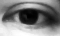

In [423]:
from PIL import Image
data = mat_data['data'][0][0][1][0][0][1]
im = Image.fromarray(data[5])
im

In [427]:
data.shape

(1068, 36, 60)

In [457]:
dd = torch.from_numpy(data)

tf = T.Compose([
    T.ToPILImage(),
    T.Grayscale(num_output_channels=1),
    T.ToTensor()
])

In [458]:
imgs = [tf(im) for im in dd]


In [470]:
torch.stack(imgs, dim=0).size()

torch.Size([1068, 1, 36, 60])

In [440]:
# 
T.ToTensor()(T.ToPILImage()(dd)).size()

torch.Size([3, 36, 60])

In [400]:
im = data[0]
t = torch.from_numpy(im)

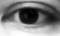

In [405]:
tf = T.Compose([T.ToPILImage(), T.ToTensor()])

T.ToPILImage()(tf(t))

In [393]:
import scipy.io as io
from torch.utils.data import TensorDataset

def mp2_create_dataset(folder_path):
    files = os.listdir(folder_path)
    tensors = []

    for file in files:
        fname = DATA_DIR.joinpath(f'MPIIGaze\\MPIIGaze\\Data\\Normalized\\p00').joinpath( file)
        mat_data= io.loadmat(fname)
        data = mat_data['data'][0][0][1][0][0][1]
        tensors.append(torch.tensor(data))

    t = torch.cat(tensors, dim=0)
    ds = TensorDataset(t,)
    return ds

ds = mp2_create_dataset(DATA_DIR.joinpath('MPIIGaze\\MPIIGaze\\Data\\Normalized\\p00'))

# UnityEyes

In [415]:
DATA_URL_WIN = 'https://www.cl.cam.ac.uk/research/rainbow/projects/unityeyes/data/UnityEyes_Windows.zip'
DATA_URL_LINUX = 'https://www.cl.cam.ac.uk/research/rainbow/projects/unityeyes/data/UnityEyes_Linux.zip'

# ds_path = 'C:\\Users\\Noam\\Downloads\\UnityEyes_Windows\\UnityEyes_Windows\\imgs'
ds_path = DATA_DIR.joinpath('UnityEyes_Windows\\UnityEyes_Windows\\imgs')

In [419]:
# im_size = 128
tf = T.Compose([
    T.Grayscale(num_output_channels=1),
    # Resize to constant spatial dimensions
    T.CenterCrop((100,150)),
    T.Resize((30, 36)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
#     T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

In [420]:
ds_mp2 = ImageFolder(os.path.dirname(ds_path), tf)

In [421]:
T.ToPILImage()(ds_mp2[321][0])

In [ ]:
## Create a custom Dataset

